In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head(65)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
60,5.0,2.0,3.5,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


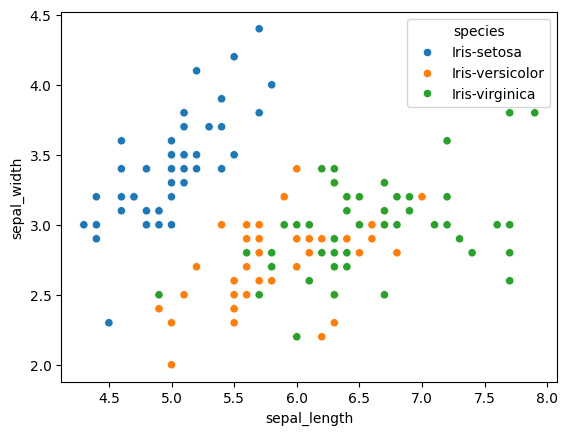

In [10]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

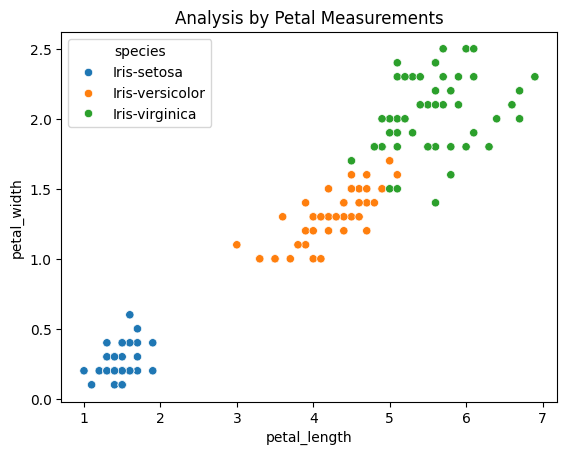

In [19]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title('Analysis by Petal Measurements');

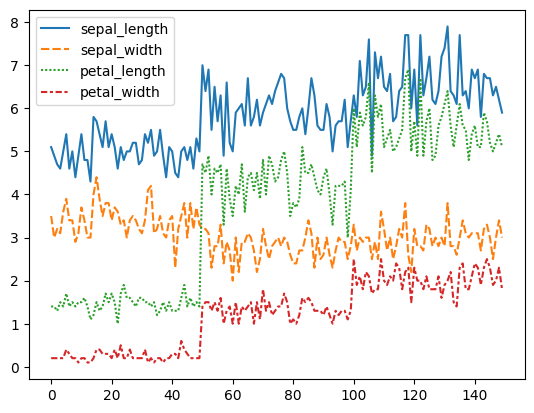

In [11]:
sns.lineplot(data=df.drop(['species'], axis=1))
plt.show()

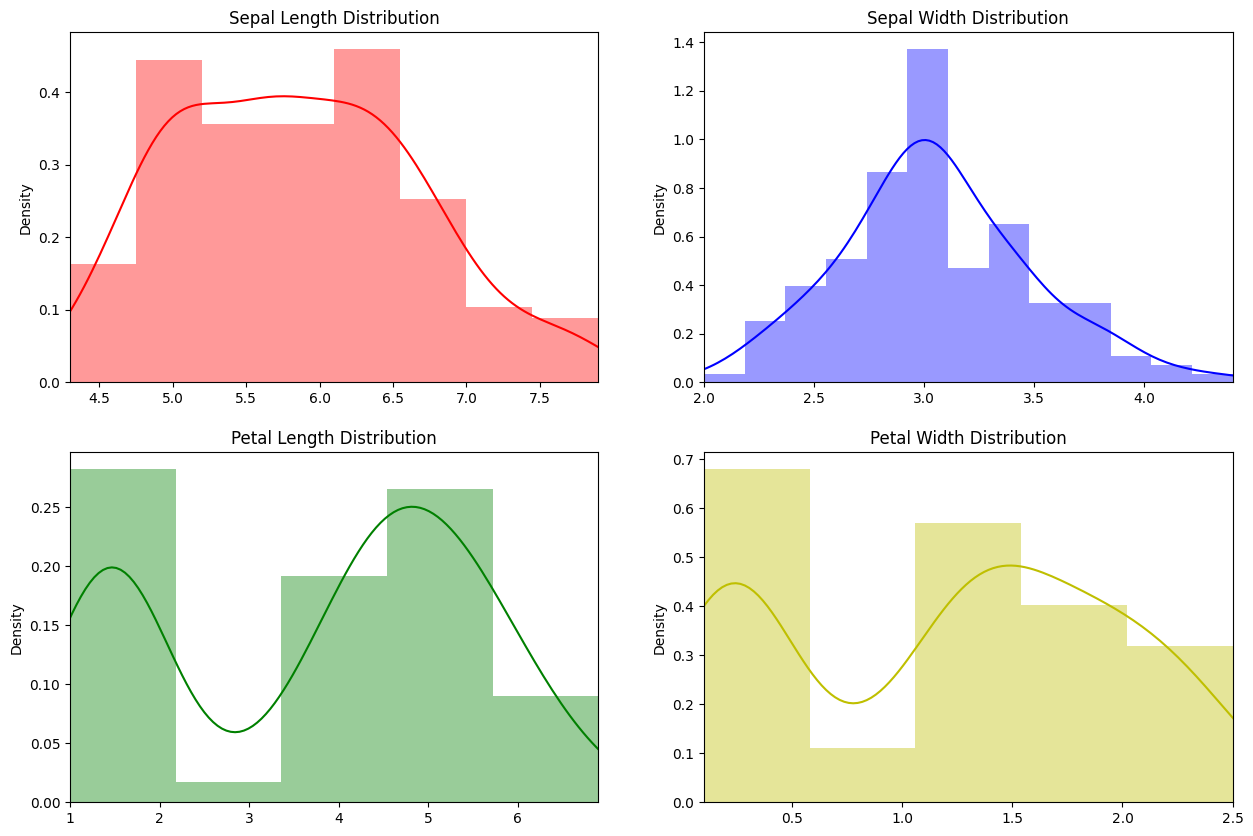

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sepal_length = df['sepal_length'].values
sepal_width = df['sepal_width'].values
petal_length = df['petal_length'].values
petal_width = df['petal_width'].values

sns.distplot(sepal_length, ax=ax[0, 0], color='r')
ax[0, 0].set_title('Sepal Length Distribution')
ax[0, 0].set_xlim([df['sepal_length'].min(), df['sepal_length'].max()])

sns.distplot(sepal_width, ax=ax[0, 1], color='b')
ax[0, 1].set_title('Sepal Width Distribution')
ax[0, 1].set_xlim([df['sepal_width'].min(), df['sepal_width'].max()])

sns.distplot(petal_length, ax=ax[1, 0], color='g')
ax[1, 0].set_title('Petal Length Distribution')
ax[1, 0].set_xlim([df['petal_length'].min(), df['petal_length'].max()])

sns.distplot(petal_width, ax=ax[1, 1], color='y')
ax[1, 1].set_title('Petal Width Distribution')
ax[1, 1].set_xlim([df['petal_width'].min(), df['petal_width'].max()])

plt.show()

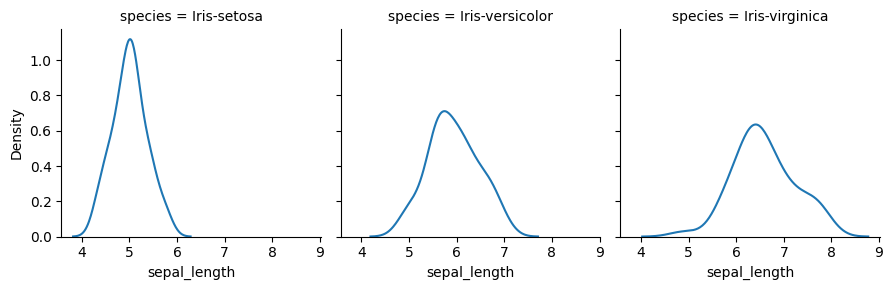

In [15]:
g = sns.FacetGrid(df, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

In [16]:
print("Distribution of Iris Flower Species is:")
print(df['species'].value_counts())

Distribution of Iris Flower Species is:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


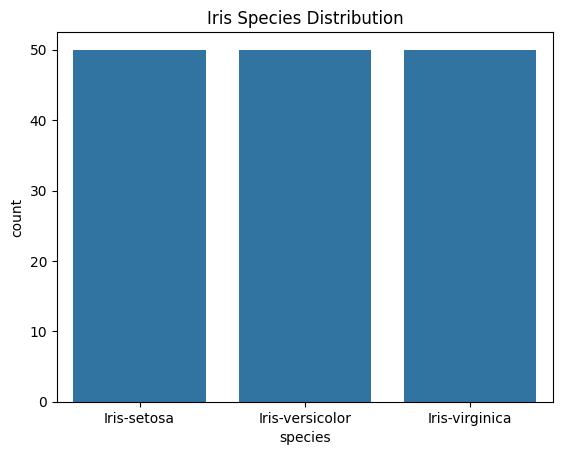

In [17]:
sns.countplot(data=df, x='species')
plt.title("Iris Species Distribution");

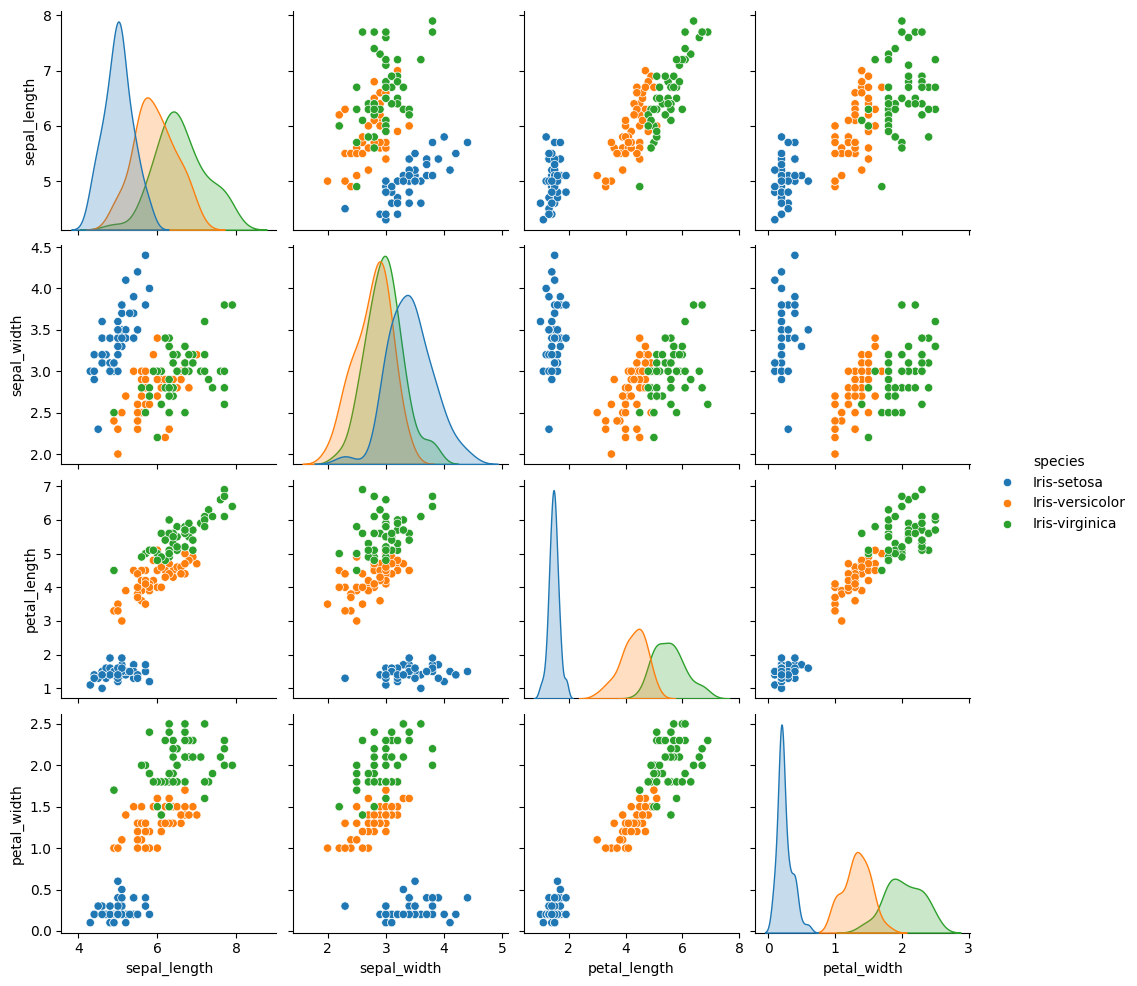

In [20]:
sns.pairplot(data=df, hue='species');

In [21]:
df['species'] = df['species'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
x = df.drop('species', axis=1)
y= df.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

print(f'Training Score: {dt_clf.score(x_train, y_train) * 100:.2f} %')
print(f'Test Score: {dt_clf.score(x_test, y_test) * 100:.2f} %')

Training Score: 100.00 %
Test Score: 96.67 %


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.9666666666666667

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

0.9833333333333333